# Assignment 2

Complete the questions below in any order you like. Remember to commit the changes to GitHub as you go. The total marks for this assignment is 30.

# Question 0 [3 marks]

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub
- You will get marks for the question for using Git (i.e., pushing your assignment to the repository when asked below)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

# Question 1: Bracketing and bisection method [9 marks]

### Q. 1a [2 marks]
Define a function for the quintic $f(x) = x^5-5 x^4-15 x^3+65 x^2+74 x-120$ and plot it in the range $x=-4\dots6$

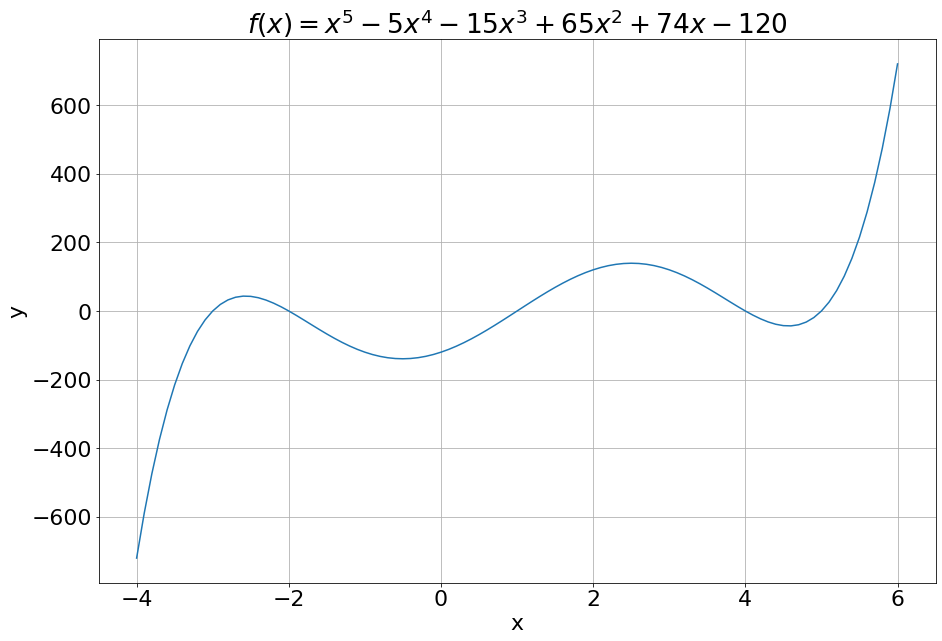

In [3]:
def f(x):
    return (x**5) - 5*(x**4) - 15*(x**3) + 65*(x**2) + (74*x) - (120)

#Create array to hold values of x from 4 to 6, with resolution of 0.1 to give smooth graph
x = np.arange(-4,6.1, 0.1) #Endpoint is 6.1 since this endppoint is not included in the array
y = f(x)

plt.plot(x,y)
plt.title('$f(x) = x^5-5 x^4-15 x^3+65 x^2+74 x-120$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

### Q. 1b [2 marks]
Using the plot, pick values of $a$ and $b$ such that $f(a) < 0$ and $f(b) > 0$ and the function has a **single** root in the region $(a,b)$. Assign variables called a and b to these values and print the values of $f(a)$ and $f(b)$.

In [4]:
# Choose a = 0, b = 2
a = 0; b = 2
print("f(a) = %.1f and f(b) = %.1f" %(f(a),f(b)))

f(a) = -120.0 and f(b) = 120.0


Use the following FindRootBisection method to find the root to within a precision of $10^{-12}$

In [5]:
# This function only works when a < b and f(a) < 0 < f(b)
def FindRootBisection(f, a, b, tol, printSteps=False):
    left = a
    right = b
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

In [6]:
FindRootBisection(f, 0, 2, 10**-12)

0.9999999999990905

### Q. 1c [5 marks]
As the comment on the above FindRootBisection( ) function says it only works when $a<b$ and $f(a) < 0 < f(b)$. Create a new function that: 
 - **also** works when $f(a) > 0 > f(b)$. 
 - Checks that $\text{sign}(f(a)) \neq \text{sign}(f(b))$. If not the function should return "sign(f(a)) = sign(f(b)) ", where $a$ and $b$ have been replaced by their values
 
Call your new function FindRootBisectionImproved( ).  
Useful function: np.sign(x) will return sign(x)

Check your new function by:
 - finding the root between $x = -2.5$ and $x=-1$
 - finding the root between $x = 0$ and $x=2$
 - attempting to find a root between $x=6$ and $x=8$ (there is not root in this region)

In [7]:
def FindRootBisectionImproved(f, a, b, tol, printSteps=False):
    
    #Perform check to see if sign(𝑓(𝑎))=sign(𝑓(𝑏))
    if np.sign(f(a)) == np.sign(f(b)):
        return ("sign(f(%.1f)) = sign(f(%.1f))" %(a,b))

    left = a
    right = b
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            if f(a) < 0:
                #Approach new midpoint from left to right
                left = midpoint
            else:
                #Approcah new midpoint from right to left
                right = midpoint
        else:
            if f(a) < 0:
                #Approcah new midpoint from right to left
                right = midpoint
            else:
                #Approcah new midpoint from left to right
                left = midpoint
        if(printSteps == True):
                print(midpoint)
    return midpoint

In [8]:
FindRootBisectionImproved(f,-2.5,-1,10**-12)

-1.9999999999997726

In [9]:
FindRootBisectionImproved(f,0,2,10**-12)

0.9999999999990905

In [10]:
FindRootBisectionImproved(f,6,8,10**-12)

'sign(f(6.0)) = sign(f(8.0))'

**Commit this question to your git repository and push the changes to GitHub**

# Question 2: Newton-Raphson method [9 marks]

### Q. 2a [3 marks]
 - Define a function $p(x) = x\log(\sqrt{x^2})$. Compute its derivative and define it as $dp(x) = \dots$
 - Plot the function between $x=-2$ and $x=2$. Label the plot axes and use a grid.
 - By visual inspection state the location of the three roots

In [11]:
#Deifine Function p(x)
def p(x):
    return (x)*(np.log(np.sqrt(x**2)))

In [27]:
#Define function to return derivative of p(x)
def dp(x):
    return np.log(np.abs(x)) + 1

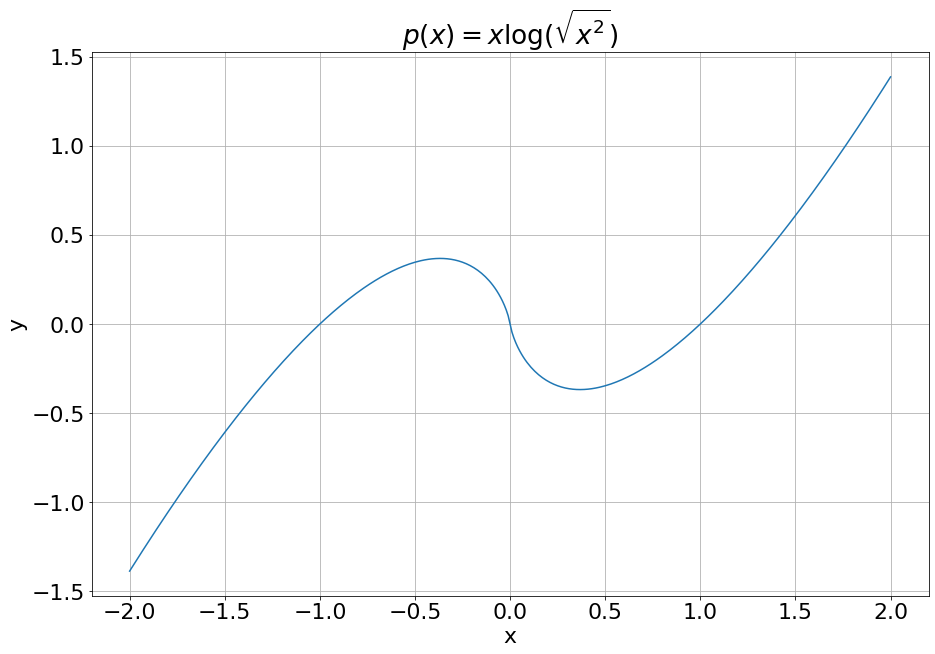

In [13]:
#Create array to hold values of x from -2 to 2, with resolution of 0.01 to give smooth graph
x = np.arange(-2,2.01, 0.01) #Endpoint is 2.01 since this endppoint is not included in the array
y = p(x)

plt.plot(x,y)
plt.title('$p(x) = x\log(\sqrt{x^2})$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

#### We can predict that the three roots of the function p(x) are:
- $x = - 1$
- $x = 0$
- $x = + 1$

### Q. 2b [2 marks]
 - Starting with a value $x_0$ near the root at $x=1$ such that $|x_0-1| \ge 0.5$ use the below Newton-Raphson code to find the root to accuracy of $1\times10^{-6}$

In [14]:
def FindRootNewtonRaphson(f, df, x0, tol, printSteps=False):
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol and count < 20:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        count += 1
        if(printSteps):
            print("x_%d = %.14lf" % (count, x0))
    return x0

In [26]:
# Choose x0 = 2
FindRootNewtonRaphson(p, dp, 2, 10**-6)

1.0

### Q. 2c [4 marks]
As we discussed in the lectures, the Newton-Raphson method (usually) converges quadradically if an initial guess is given that is sufficiently close to the root. If the guess is too far from the root the method can diverge. In this question we will find the critical value between converging and diverging where the method oscilliates with period 2.

If we define $F(x) = x - p(x)/p'(x)$, then a period-2 orbit will occur when $F(F(x)) = x$. In general this will be a complicated function so it might be very difficult to find the solution analytically. Instead, we can write this equation as $F(F(x)) - x = 0$, so the value of $x$ we want is the root.

- Define a function F(x)
- Define a function F2(x) which returns $F(F(x)) - x$
- Plot F2(x) between $x=-0.2\dots0.2$. Restrict the range on the $y$-axis to be between $-0.5$ and $0.5$. Add labels and a grid.

In [16]:
def F(x):
    return x - p(x)/dp(x)

In [17]:
def F2(x):
    return F(F(x)) - x

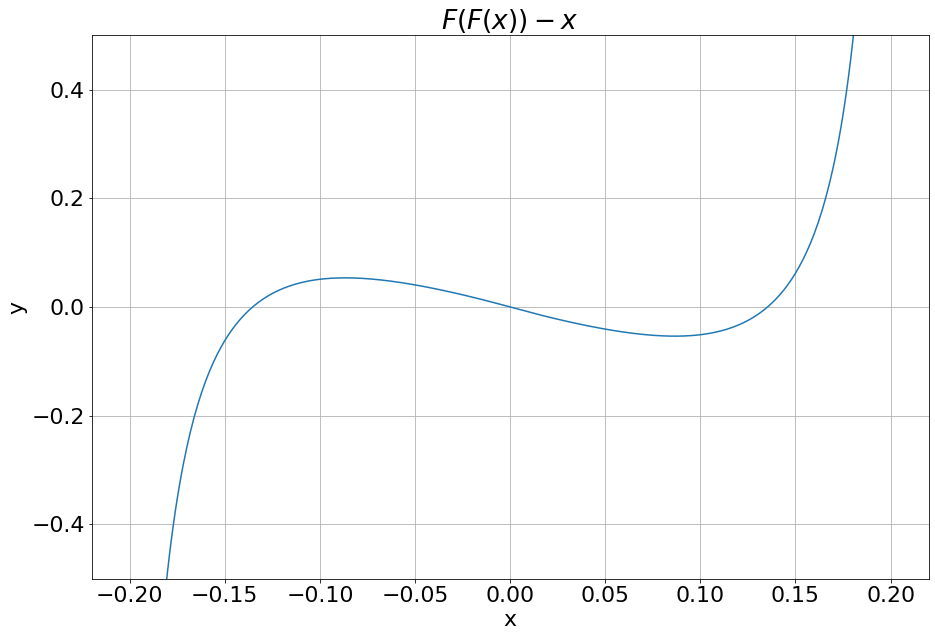

In [29]:
#Plot F2(x)
x = np.arange(-0.2,0.2001,0.001) #Use intervals of 0.001 to give smooth curve
y = F2(x)

plt.plot(x,y)
plt.ylim(-0.5,0.5) #Set y limits from -0.5 to 0.5
plt.title('$F(F(x)) - x$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

- We want to find a root with $x \neq \{-1,0,1\}$. As we don't have easy access to the derivative of the function $F2(x)$ use the bisection method function from above to find a root to a precision of $10^{-15}$. Use the plot from the previous part to bracket a root. **Assign** the vaue of the root of the variable 'x2' and also print(x2).
- Using the Newton-Raphson method with the function $p(x)$ and the initial guess x2. Set the final argument to True to print out the steps in the method takes. You should see that they oscillate between two values and does not converge.

In [30]:
# Use the Bisection method to find a root of F2(x), to give a starting value on p(x) which causes a period 2 oscillation
# Use -0.15 and -0.1 as the bracketing range
x2 = FindRootBisectionImproved(F2,-0.15,-0.1,10**-15)
print(x2)

-0.13533528323661342


In [31]:
# Set starting point to the root of F2(x) function as calculated above.
FindRootNewtonRaphson(p, dp, x2, 10**-6, True)

x_2 = 0.13533528323661
x_3 = -0.13533528323662
x_4 = 0.13533528323662
x_5 = -0.13533528323662
x_6 = 0.13533528323664
x_7 = -0.13533528323666
x_8 = 0.13533528323671
x_9 = -0.13533528323680
x_10 = 0.13533528323698
x_11 = -0.13533528323735
x_12 = 0.13533528323810
x_13 = -0.13533528323958
x_14 = 0.13533528324255
x_15 = -0.13533528324849
x_16 = 0.13533528326036
x_17 = -0.13533528328411
x_18 = 0.13533528333160
x_19 = -0.13533528342660
x_20 = 0.13533528361658


0.13533528361657993

By slightly perturbing the initial guess we can get the method to converge or diverge. Try:
 - adding $10^{-3}$ to the initial guess. Does the method converge or diverge? If it converges, to which root does it converge?
 - subtracting $10^{-3}$ from the initial guess. Does the method converge or diverge? If it converges, to which root does it converge?
 
In both cases set the final argument to 'True' to get the function to print the steps the method is taking

<b>Add $10^{-3}$ to Initial Guess

In [34]:
FindRootNewtonRaphson(p, dp, x2+10**-3, 10**-6, True)

x_2 = 0.13334632152318
x_3 = -0.13140085125823
x_4 = 0.12763526695955
x_5 = -0.12057231447084
x_6 = 0.10808759363308
x_7 = -0.08824821801383
x_8 = 0.06181571044996
x_9 = -0.03465787678813
x_10 = 0.01467167593718
x_11 = -0.00455382393268
x_12 = 0.00103689521430
x_13 = -0.00017659727583
x_14 = 0.00002310986987
x_15 = -0.00000238855513
x_16 = 0.00000019996574
x_17 = -0.00000001386233
x_18 = 0.00000000081094


8.109426700684643e-10

It appears that this preturbed starting position causes convergence towards the $x = 0$ root although it does not converge finately. The iterations of the root become closer and closer to 0 hinting that the function will eventually converge at 0 if given enough iteratiuons

<b>Subtract $10^{-3}$ from initail guess

In [22]:
FindRootNewtonRaphson(p, dp, (x2-10**-3), 10**-6, True)

x_2 = 0.13734641252178
x_3 = -0.13940274435168
x_4 = 0.14365669284138
x_5 = -0.15277281420574
x_6 = 0.17384186884635
x_7 = -0.23191000128729
x_8 = 0.50261602037184
x_9 = 1.61058113396178
x_10 = 1.09073988553056
x_11 = 1.00357326506189
x_12 = 1.00000634630754
x_13 = 1.00000000002014
x_14 = 1.00000000000000


1.0

We can see that this perturbed starting position causes the root finder to converge on the root at x = 1

**Commit this question to your git repository and push the changes to GitHub**

# Question 3: Slow convergence of the Newton-Raphson method at repeated roots [9 marks]
The Newton-Raphson method usual converges quadratically but it will converge more slowly at repeated roots. In this question we will look at an example of this.

Define the function $g(x) = (x+1)^2(x-2)$, and also define its derivative $g'(x)$. Plot the function from $x=-2\dots2.5$

Run the FindRootNewtonRaphson command with the final (optional) argument set to True to see the steps the algorithm takes. Run it with:
 - the initial value of $x_0 = -1.5$
 - the initial value of $x_0 = 1.5$

What do you notice about the convergence rates in these two cases? Let's examine it more carefully. The function below returns the individual steps of the Newton-Raphson algorithm.

In [23]:
def FindRootNewtonRaphsonSteps(f, df, x0, tol):
    steps = np.array([x0])
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        steps = np.append(steps, x0)
        count += 1
    return steps

Using the above function:
- compute the steps for the function $g(x)$ with  $x_0 = 1.5$. Assign the result to a variable.
- compute the steps for the function $g(x)$ with  $x_0 = -1.5$. Assign the result to a different variable.

Plot the absolute difference between the steps and the relevant root, i.e., $|x_n - x_*|$, on a log scale.

You should find the repeated difference for the repeated root looks linear on the log-scale, which is the same as we saw for the bisection method. This (correctly) suggests that for repeated roots the Newton-Raphson converges linearly (rather than quadratically)

**Commit this question to your git repository and push the changes to GitHub**

## Submitting your assignment to BrightSpace

To submit your assignment compress your entire ACM20030-Assignments folder (this will contain this assignment and assignment 1) and uploaded the zip file to BrightSpace. DO NOT download the zip file from the GitHub browser interface.